# Level 1

### Use a nearest neighbour classifier on a dataset. Supply a random half of your data examples as training data, and test on the remainder. Plot the value of the test error as you increase the value of $k$ from 1 to 15. What do you notice about even numbered values of $k$?


In [1]:
import pandas as pd
import numpy as np
from sklearn import neighbors, datasets, model_selection
from matplotlib import pyplot as plt
% matplotlib inline

In [2]:
iris = datasets.load_iris()

In [3]:
num_examples = iris.data.shape[0]
train_data, test_data, \
train_labels, test_labels = model_selection.train_test_split(iris.data, \
                                                             iris.target, \
                                                             test_size = 0.5, \
                                                             random_state=0) 

In [4]:
accs = []
for num_neighbors in range (1, 16, 1):
    knn = neighbors.KNeighborsClassifier(n_neighbors=num_neighbors)
    knn.fit(train_data, train_labels)
    accs.append(knn.score(y=test_labels, X=test_data))
  
print accs

[0.9066666666666666, 0.8933333333333333, 0.9333333333333333, 0.92, 0.96, 0.9333333333333333, 0.96, 0.9466666666666667, 0.9733333333333334, 0.9466666666666667, 0.9466666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333]


Text(0.5,0,'Number of neighbours')

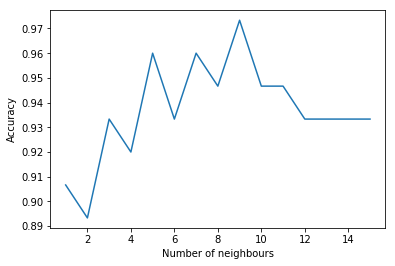

In [5]:
x = range(1, 16, 1)
plt.plot(x, accs)
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbours')

#### Even number of neighbours reduces accuracy

### Repeat the target above, but over several random train/test splits - plot an average across random variation, including error bars for the standard deviation. What do you notice?


In [6]:
first_loop_init = True
for i in range(10):
    train_data, test_data, \
    train_labels, test_labels = model_selection.train_test_split(iris.data, \
                                                             iris.target, \
                                                             test_size = 0.5, \
                                                             random_state=i)
    accs = []
    for num_neighbors in range (1, 16, 1):
        knn = neighbors.KNeighborsClassifier(n_neighbors=num_neighbors)
        knn.fit(train_data, train_labels)
        accs.append(knn.score(y=test_labels, X=test_data))
    if first_loop_init:
        accuracy_dataframe = pd.DataFrame(np.array(accs))
        first_loop_init = False
    else:
        accuracy_dataframe = \
            pd.concat([accuracy_dataframe, pd.DataFrame(np.array(accs))], \
                      axis=1)
        
accuracy_dataframe        

,0,0,0,0,0,0,0,0,0,0
0,0.906667,0.946667,0.973333,0.960000,0.946667,0.960000,0.946667,0.946667,0.973333,0.960000
1,0.893333,0.920000,0.946667,0.960000,0.946667,0.920000,0.946667,0.946667,0.960000,0.933333
2,0.933333,0.920000,0.973333,0.946667,0.960000,0.973333,0.973333,0.960000,0.960000,0.960000
3,0.920000,0.920000,0.946667,0.960000,0.960000,0.960000,0.946667,0.933333,0.933333,0.973333
4,0.960000,0.946667,0.973333,0.946667,0.960000,0.960000,0.960000,0.946667,0.946667,0.986667
5,0.933333,0.933333,0.946667,0.960000,0.973333,0.960000,0.946667,0.946667,0.946667,0.986667
6,0.960000,0.960000,0.946667,0.960000,0.973333,0.973333,0.946667,0.946667,0.960000,0.973333
7,0.946667,0.973333,0.933333,0.960000,0.973333,0.946667,0.946667,0.920000,0.946667,0.973333
8,0.973333,0.973333,0.960000,0.973333,0.973333,0.973333,0.946667,0.933333,0.960000,1.000000
9,0.946667,0.973333,0.960000,0.960000,0.973333,0.946667,0.906667,0.933333,0.920000,0.986667


In [7]:
mean_accs = []
std_accs = []
for i in range(accuracy_dataframe.shape[0]):
    mean_accs.append(accuracy_dataframe.iloc[i].mean())
    std_accs.append(accuracy_dataframe.iloc[i].std())

print mean_accs
print std_accs

[0.952, 0.9373333333333335, 0.9560000000000002, 0.9453333333333334, 0.9586666666666666, 0.9533333333333334, 0.9599999999999997, 0.952, 0.9666666666666668, 0.9506666666666665, 0.9573333333333333, 0.9506666666666665, 0.9533333333333334, 0.9466666666666667, 0.9453333333333334]
[0.019064542746246436, 0.020893616486298935, 0.017833246797990115, 0.018270937592083952, 0.013259052346823392, 0.016923940235253135, 0.010886621079036372, 0.017998628205614754, 0.018053418676968813, 0.02518082750971609, 0.024983945462320353, 0.03208014654687751, 0.02757705254664636, 0.03079201435678005, 0.028423603476123546]


<ErrorbarContainer object of 3 artists>

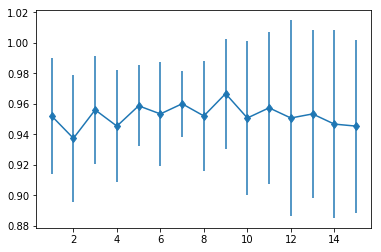

In [11]:

sigmx2_accs = [2 * x for x in std_accs]
xs = np.arange(1, 16, 1)

plt.errorbar(x=xs, y=mean_accs, yerr = sigmx2_accs, marker='d')

# Level 2

### Use the knn model and analyse how much time it takes to classify data points with different numbers of features, and different numbers of examples in the training data.

In [25]:
import time
from sklearn.preprocessing import Normalizer

In [12]:
knn = neighbors.KNeighborsClassifier(n_neighbors=7)

In [69]:
iris = datasets.load_iris()
wine = datasets.load_wine()

In [70]:
print 'Number of iris features:', iris.data.shape[1]
print 'Number of wine features:', wine.data.shape[1]

Number of iris features: 4
Number of wine features: 13


In [71]:
print 'Number of iris examples:', iris.data.shape[0]
print 'Number of wine examples:', wine.data.shape[0]

Number of iris examples: 150
Number of wine examples: 178


Number of features is significantly different whereas the number of examples is not so different.

In [72]:
train_iris_data, test_iris_data, train_iris_labels, test_iris_labels = \
    model_selection.train_test_split(iris.data, iris.target, test_size=0.5)

In [116]:
train_wine_data, test_wine_data, train_wine_labels, test_wine_labels = \
    model_selection.train_test_split(wine.data[:150], wine.target[:150], test_size=0.5)

In [114]:
start_time = time.clock()
for i in range(5000):
    knn.fit(train_iris_data, train_iris_labels)
    knn.predict(test_iris_data)
print time.clock() - start_time, 'seconds'


15.9973079262 seconds


In [115]:
start_time = time.clock()
for i in range(5000):
    knn.fit(train_wine_data, train_wine_labels)
    knn.predict(test_wine_data)
print time.clock() - start_time, 'seconds'

16.8796508301 seconds


Wine datasets which has more features requires more time to classify test points

In [118]:
train_iris_data, test_iris_data, train_iris_labels, test_iris_labels = \
    model_selection.train_test_split(iris.data, iris.target, test_size=0.2)

In [120]:
train_iris_data_small, test_iris_data_small, \
train_iris_labels_small, test_iris_labels_small = \
    model_selection.train_test_split(train_iris_data, train_iris_labels, \
                                     test_size=0.5)

In [126]:
start_time = time.clock()
for i in range(2000):
    knn.fit(train_iris_data, train_iris_labels)
    knn.predict(test_iris_data)
print time.clock() - start_time, 'seconds'

6.12621913096 seconds


In [127]:
start_time = time.clock()
for i in range(2000):
    knn.fit(train_iris_data_small, train_iris_labels_small)
    knn.predict(test_iris_data)
print time.clock() - start_time, 'seconds'

5.40485497014 seconds


Dataset containing smaller number of training examples classify test points faster

### Build a decision tree with a maximum depth of 10, and a minimum number of examples of 5, using any dataset. Remember to do a train/test split. Repeat this with a minimum number of examples of 500. What is the difference in test error? Plot a graph of the training error and testing error, as you change this minimum number.

In [129]:
from sklearn import tree

In [237]:
bc = datasets.load_digits()
bc.data.shape[0]

1797L

In [281]:
dec_tree = tree.DecisionTreeClassifier(max_depth=100, min_samples_split=6,random_state=0)

In [282]:
train_data, test_data, train_labels, test_labels = \
    model_selection.train_test_split(bc.data, bc.target, test_size=0.7, random_state = 0)

In [273]:
# normalizer = Normalizer().fit(train_data)
# train_data_norm = normalizer.transform(train_data)
# test_data_norm = normalizer.transform(test_data)

In [283]:
dec_tree.fit(train_data, train_labels)
print 'Train data accuracy', dec_tree.score(train_data, train_labels)
print 'Test data accuracy', dec_tree.score(test_data, test_labels)

Train data accuracy 0.9666048237476809
Test data accuracy 0.7845786963434023


In [269]:
dec_tree = tree.DecisionTreeClassifier(max_depth=100, min_samples_split=500, random_state=0)
dec_tree.fit(train_data, train_labels)
print 'Train data accuracy', dec_tree.score(train_data, train_labels)
print 'Test data accuracy', dec_tree.score(test_data, test_labels)

Train data accuracy 0.21150278293135436
Test data accuracy 0.1820349761526232
